# Pré-processamento de dados: limpeza, normalização e transformação

# 1 Importação das bibliotecas necessárias

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Carregamento do dataset "Dados de Funcionários"
Este dataset, gerado para a finalidade deste notebook, contém informações fictícias sobre funcionários de uma empresa. 

- Principais Características do Dataset:
    - ID: Identificador único do funcionário.
    - Nome: Nome do funcionário.
    - Idade: Idade do funcionário (em anos).
    - Salário: Salário do funcionário (em dólares).
    - Departamento: Departamento em que o funcionário trabalha (TI, RH, Financeiro, Vendas).
    - Horas_Semanais: Número de horas trabalhadas por semana.
    - Desempenho: Avaliação do desempenho do funcionário (Bom, Regular, Excelente) ou valores faltantes.
    - Bonus: Valor do bônus recebido (em dólares).
    - Sexo: Gênero do funcionário (Masculino, Feminino).
    - Experiência: Número de anos de experiência do funcionário.
    - Formação: Nível de formação acadêmica (Superior, Técnico, Médio).
    - Projetos: Número de projetos realizados pelo funcionário.
    - Avaliação: Avaliação geral do funcionário (em uma escala de 1 a 10).

- Importância das Variáveis:
    - ID: Identificador único que permite distinguir entre diferentes funcionários.
    - Nome: Nome do funcionário, útil para referência e identificação, mas não utilizado diretamente nas análises.
    - Idade: A idade pode influenciar a experiência e o perfil do funcionário, possivelmente afetando o salário e a avaliação de desempenho.
    - Salário: O salário é um indicador direto da remuneração do funcionário e pode ser influenciado por outros fatores como experiência e desempenho.
    - Departamento: O departamento pode afetar o salário e a avaliação de desempenho, com diferentes áreas possuindo diferentes estruturas salariais e critérios de avaliação.
    - Horas_Semanais: O número de horas trabalhadas pode impactar o salário e o bônus recebido, além de refletir o esforço e a carga de trabalho.
    - Desempenho: A avaliação de desempenho é um fator importante para determinar bônus e promoções, influenciando diretamente o progresso na carreira do funcionário.
    - Bonus: O valor do bônus recebido é uma medida do reconhecimento e recompensa do funcionário, geralmente ligado ao desempenho e contribuições.
    - Sexo: O gênero pode ser analisado para entender a equidade salarial e de oportunidades dentro da empresa.
    - Experiência: Anos de experiência podem influenciar o salário e a avaliação de desempenho, com mais experiência geralmente resultando em salários mais altos e melhores avaliações.
    - Formação: O nível de formação acadêmica pode impactar o salário e as oportunidades de carreira, com qualificações mais altas frequentemente levando a cargos mais bem remunerados.
    - Projetos: O número de projetos realizados pode refletir a produtividade e o impacto do funcionário na empresa, influenciando a avaliação e o salário.
    - Avaliação: A avaliação geral é uma medida do desempenho do funcionário e pode afetar o salário, bônus e oportunidades de promoção.

In [16]:
df = pd.read_csv('datasets/funcionarios.csv', delimiter=",")

# 3 Análise inicial do dataset

## 3.1 Primeiras linhas do dataset

In [17]:
df.head()

,ID,Nome,Idade,Salário,Departamento,Horas_Semanais,Desempenho,Bonus,Sexo,Experiência,Formação,Projetos,Avaliação
0,1,Nome_1,62,7554.21,TI,46.0,Regular,293.64,Masculino,18,Médio,10,9.3
1,2,Nome_2,65,3855.51,TI,41.0,Excelente,1693.43,Feminino,25,Técnico,3,5.2
2,3,Nome_3,18,4419.31,Vendas,31.0,Bom,729.71,Feminino,21,Superior,4,3.2
3,4,Nome_4,21,5798.37,TI,40.0,Bom,878.55,Feminino,13,Técnico,13,5.0
4,5,Nome_5,21,7343.92,TI,35.0,NaN,1919.65,Feminino,16,Médio,1,8.5


## 3.2 Informações do dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1050 non-null   int64  
 1   Nome            1050 non-null   object 
 2   Idade           1050 non-null   int64  
 3   Salário         947 non-null    float64
 4   Departamento    1050 non-null   object 
 5   Horas_Semanais  996 non-null    float64
 6   Desempenho      753 non-null    object 
 7   Bonus           1050 non-null   float64
 8   Sexo            1050 non-null   object 
 9   Experiência     1050 non-null   int64  
 10  Formação        1050 non-null   object 
 11  Projetos        1050 non-null   int64  
 12  Avaliação       1050 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 106.8+ KB


## 3.3 Estatísticas descritivas do dataset

In [19]:
df.describe()

,ID,Idade,Salário,Horas_Semanais,Bonus,Experiência,Projetos,Avaliação
count,1050.000000,1050.000000,947.000000,996.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,496.127619,43.100952,5297.911841,39.228916,1017.096343,14.790476,7.531429,5.502476
std,288.996893,15.269467,2182.139124,5.659501,571.812297,8.297490,3.970994,2.647029
min,1.000000,18.000000,2000.360000,30.000000,1.630000,1.000000,1.000000,1.000000
25%,247.250000,30.000000,3563.650000,35.000000,526.015000,7.000000,4.000000,3.100000
50%,498.500000,43.000000,5143.970000,39.000000,1051.930000,15.000000,8.000000,5.500000
75%,744.750000,56.000000,6696.095000,44.000000,1522.330000,22.000000,11.000000,7.800000
max,1000.000000,69.000000,12976.809566,49.000000,1998.630000,29.000000,14.000000,10.000000


# 4 Limpeza de dados

## 4.1 Verificar quantidade de variáveis nulas

In [20]:
#Verificar quantidade de variáveis nulas
df.isnull().sum()

ID                  0
Nome                0
Idade               0
Salário           103
Departamento        0
Horas_Semanais     54
Desempenho        297
Bonus               0
Sexo                0
Experiência         0
Formação            0
Projetos            0
Avaliação           0
dtype: int64

## 4.2 Porcentagem de dados faltantes

In [21]:
print("Dados faltantes")
missing_data = df.isnull().sum()
missing_percent = missing_data / len(df)*100
print(pd.DataFrame({'Missing Values': missing_data, 'Missing Percentage': missing_percent}))

Dados faltantes
                Missing Values  Missing Percentage
ID                           0            0.000000
Nome                         0            0.000000
Idade                        0            0.000000
Salário                    103            9.809524
Departamento                 0            0.000000
Horas_Semanais              54            5.142857
Desempenho                 297           28.285714
Bonus                        0            0.000000
Sexo                         0            0.000000
Experiência                  0            0.000000
Formação                     0            0.000000
Projetos                     0            0.000000
Avaliação                    0            0.000000


## 4.3 Estratégias de Imputação dos valores faltantes

In [22]:
df_imputed = df
df_imputed['Salário'] = df_imputed['Salário'].fillna(df_imputed['Salário'].median())
df_imputed['Horas_Semanais'] = df_imputed['Horas_Semanais'].fillna(df_imputed['Horas_Semanais'].median())
df_imputed['Desempenho'] = df_imputed['Desempenho'].fillna(df_imputed['Desempenho'].mode()[0])

## 4.3 Dataset após imputação de valores faltantes

In [23]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1050 non-null   int64  
 1   Nome            1050 non-null   object 
 2   Idade           1050 non-null   int64  
 3   Salário         1050 non-null   float64
 4   Departamento    1050 non-null   object 
 5   Horas_Semanais  1050 non-null   float64
 6   Desempenho      1050 non-null   object 
 7   Bonus           1050 non-null   float64
 8   Sexo            1050 non-null   object 
 9   Experiência     1050 non-null   int64  
 10  Formação        1050 non-null   object 
 11  Projetos        1050 non-null   int64  
 12  Avaliação       1050 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 106.8+ KB


# 5 Detecção e Tratamento de Outliers

## 5.1 Identificação de Outliers

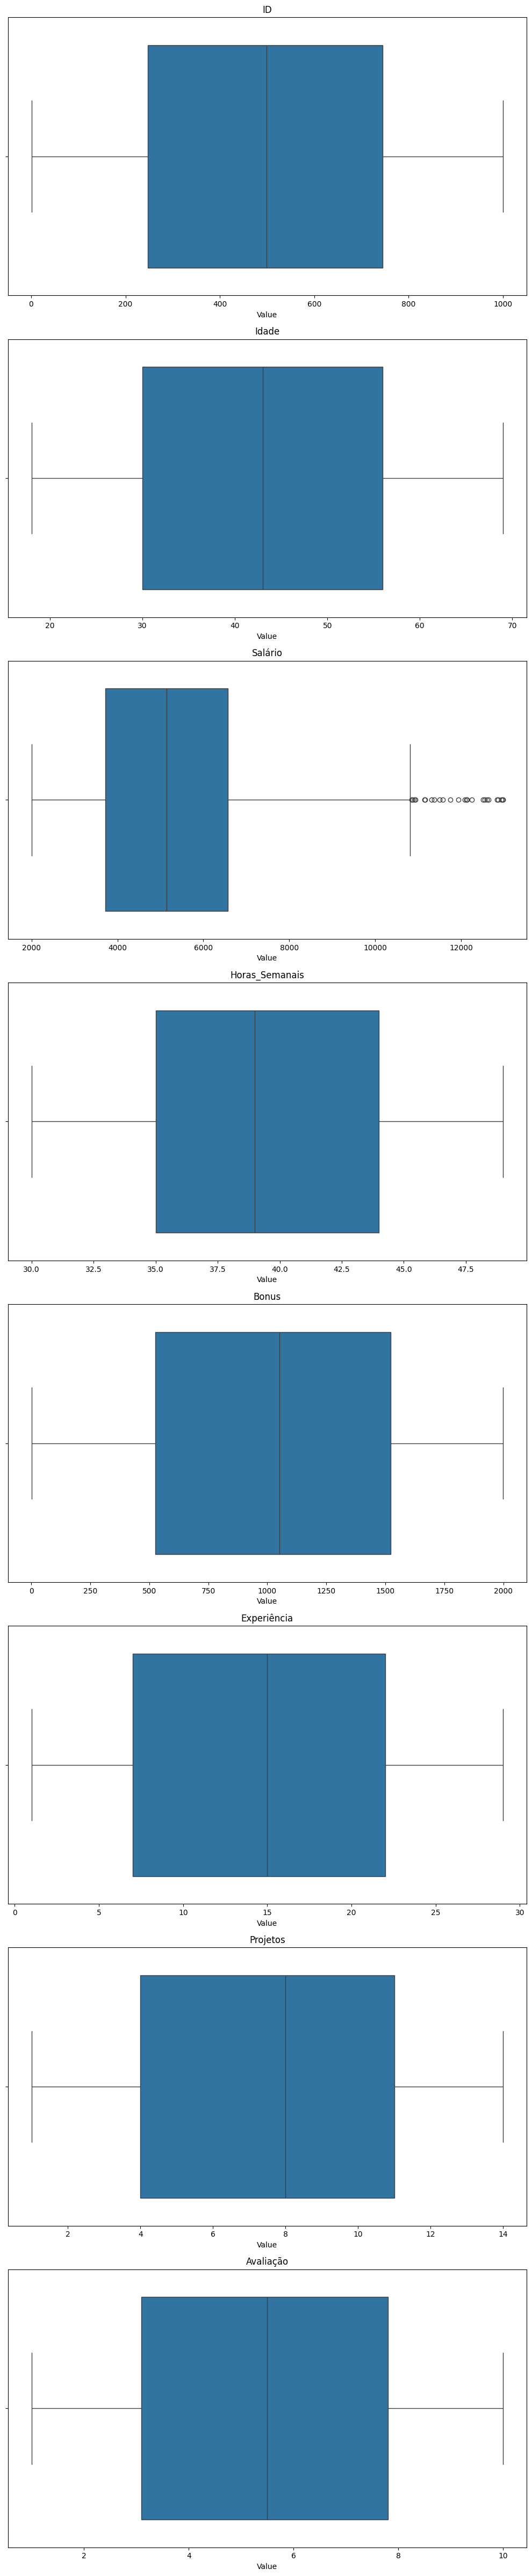

In [24]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 6*len(numeric_cols)))

# Iterate over each numeric variable
for i, col in enumerate(numeric_cols):
    # Create a boxplot for the current variable
    sns.boxplot(data=df[col], ax=axs[i], orient='h')
    
    # Set title and labels
    axs[i].set_title(col)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

## 5.2 Tratamento dos Outliers

In [25]:
df_imputed_wo_outlier = df_imputed
# Definindo o limite superior como o percentil 95
salario_limit = df_imputed_wo_outlier['Salário'].quantile(0.95)
# Falso ou True se atender a condição abaixo:
# df_imputed_wo_outlier['Salário'] > salario_limit
# df_imputed_wo_outlier[df_imputed_wo_outlier['Salário'] <= salario_limit].info()
# loc atribui um valor se atender o requisito
df_imputed_wo_outlier.loc[df_imputed_wo_outlier['Salário'] > salario_limit, 'Salário' ] = salario_limit

In [26]:
df_imputed_wo_outlier['Salário'].quantile(0.999)

np.float64(7982.2035)

## 5.3 Boxplot após tratamento de outliers

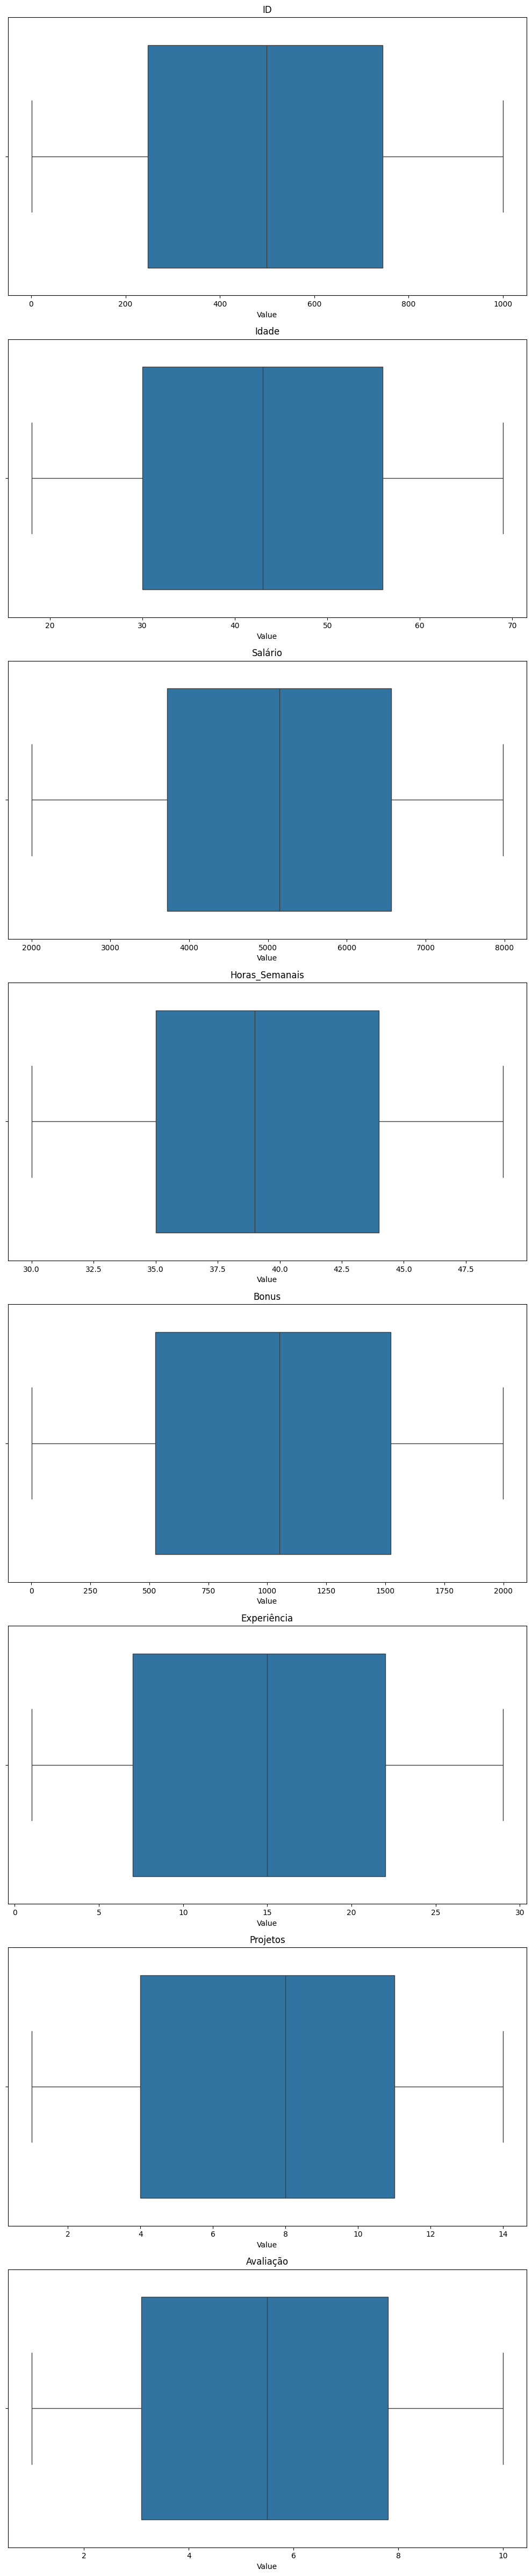

In [27]:
numeric_cols = df_imputed_wo_outlier.select_dtypes(include=['int64', 'float64']).columns

# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 6*len(numeric_cols)))

# Iterate over each numeric variable
for i, col in enumerate(numeric_cols):
    # Create a boxplot for the current variable
    sns.boxplot(data=df_imputed_wo_outlier[col], ax=axs[i], orient='h')
    
    # Set title and labels
    axs[i].set_title(col)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

# 6 Remoção de dados duplicados

## 6.1 Identificação de duplicatas

In [28]:
df_wo_duplicates = df_imputed_wo_outlier

In [29]:
duplicates = df_imputed_wo_outlier.duplicated().sum()
print(f"Existem {duplicates} linhas duplicadas")

Existem 48 linhas duplicadas


# 6.2  Remoção de Dados Duplicados

In [30]:
df_wo_duplicates = df_wo_duplicates.drop_duplicates()
print(f"Existem {df_wo_duplicates.duplicated().sum()} linhas duplicadas")

Existem 0 linhas duplicadas


# 7 Pré-processamento dos dados

# 7.1 Normalização

In [31]:
df_treated = df_wo_duplicates

scaler = StandardScaler()
df_treated[['Salário','Horas_Semanais','Bonus','Experiência','Projetos','Avaliação']] = scaler.fit_transform(df_treated[['Salário','Horas_Semanais','Bonus','Experiência','Projetos','Avaliação']])

C:\Users\Mateus\AppData\Local\Temp\ipykernel_17672\2205407778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treated[['Salário','Horas_Semanais','Bonus','Experiência','Projetos','Avaliação']] = scaler.fit_transform(df_treated[['Salário','Horas_Semanais','Bonus','Experiência','Projetos','Avaliação']])


In [32]:
df_treated

,ID,Nome,Idade,Salário,Departamento,Horas_Semanais,Desempenho,Bonus,Sexo,Experiência,Formação,Projetos,Avaliação
0,1,Nome_1,62,1.370452,TI,1.224758,Regular,-1.267836,Masculino,0.380655,Médio,0.620665,1.435123
1,2,Nome_2,65,-0.750146,TI,0.318133,Excelente,1.181224,Feminino,1.222367,Técnico,-1.134715,-0.110863
2,3,Nome_3,18,-0.426899,Vendas,-1.495117,Bom,-0.504891,Feminino,0.741389,Superior,-0.883947,-0.865003
3,4,Nome_4,21,0.363765,TI,0.136808,Bom,-0.244482,Feminino,-0.220568,Técnico,1.372971,-0.186277
4,5,Nome_5,21,1.249885,TI,-0.769817,Bom,1.577017,Feminino,0.140165,Médio,-1.636253,1.133467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,998,Nome_998,47,-0.573387,Financeiro,1.043433,Excelente,-1.428605,Feminino,-1.663504,Técnico,0.871433,0.605570
998,999,Nome_999,23,-1.195095,Financeiro,1.224758,Bom,-1.692444,Masculino,0.140165,Técnico,-0.131641,0.077672
999,1000,Nome_1000,34,-0.087886,Financeiro,1.224758,Bom,1.147510,Masculino,-0.821792,Médio,0.871433,-1.694556
1023,770,Nome_770,30,1.615836,Vendas,-0.044517,Regular,0.273309,Feminino,-0.340813,Médio,1.372971,-1.430607
